<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/Hierarchical_logreg_Adversaries_Stagewise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import sklearn
import numpy as np
import random
import time
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

![alt text](https://drive.google.com/uc?authuser=0&id=1a62cHiH8MLYizC_RdF3cQrYatKbVffJO&export=download)

#Preprocessing

In [0]:
start=time.time()

In [0]:
mnist = keras.datasets.mnist
(train_images, train_label), (test_images, test_label) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
train_images=(train_images).reshape(60000,784)
test_images=(test_images).reshape(10000,784)

In [0]:
model=[]
model.insert(0,"Deepanshu")

#Distortion

In [0]:
#@title Adjust Breakdown Accuracy (in %)
breakdown_acc =  70 #@param {type: "slider", min: 0, max: 100}
breakdown_acc=breakdown_acc/100
breakdown_acc

0.7

In [0]:
distortion_list=[0,0.01,0.05,0.1,0.15,0.2,0.3,0.35,0.4,0.7]
accuracy=np.empty([7,len(distortion_list)])
len(distortion_list)

10

In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def colourmat(pred,test_label):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,np.unique(test_label), title='Confusion matrix')
  plt.show()

In [0]:
def plotgraph(acc,distortion):
  plt.xlabel('Distortion')
  plt.ylabel('Accuracy')
  xs = acc
  ys = distortion_list
  for i in range(len(distortion_list)):
    if np.sign(breakdown_acc-acc[i])==1:
      cur=i
      prev=i-1
      break
  x=distortion_list[prev]+((acc[prev]-breakdown_acc)*(distortion_list[cur]-distortion_list[prev])/(acc[prev]-acc[cur]))
  print("Breakdown Distortion: ",x)
  plt.plot(ys,xs)
  plt.plot(x,breakdown_acc,'ro')
  plt.title("Variation of accuracy with distortion")
  plt.show

In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,784)

def create_dist(test_images,test_lbl,model_no):
  dist_test = np.empty([test_lbl.shape[0],784])
  acc = []
  
  test=np.empty([test_lbl.shape[0],784])
  for i in range(test_lbl.shape[0]):
    for j in range(784):
      test[i][j]=test_images[i][j]
  test=test.reshape(test_lbl.shape[0],784)  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([test_lbl.shape[0],784])
    for i in range(test_lbl.shape[0]):
      dist_test[i] = Hdistort(test,distortion,i)
    pred=(model[model_no].predict(dist_test))
    test_acc=accuracy_score(pred,test_lbl)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    colourmat(pred,test_lbl)
    print()
    
    print("---------------------------------------------------------")
  if (acc[len(distortion_list)-1]<breakdown_acc):
    plotgraph(acc,distortion_list)
  else:
    print("Accuracy didn't fall below {}%".format(breakdown_acc*100))
  return acc

#Model 1

*Circles or not*

In [0]:
train_label_h1=np.empty([60000,])
for i in range(60000):
  if train_label[i]==1 or train_label[i]==2 or train_label[i]==3 or train_label[i]==4 or train_label[i]==5 or train_label[i]==7:    #||3||4||5||7
    train_label_h1[i]=0
  else:
    train_label_h1[i]=1
    
test_label_h1=np.empty([10000,])
for i in range(10000):
  if test_label[i]==1 or test_label[i]==2 or test_label[i]==3 or test_label[i]==4 or test_label[i]==5 or test_label[i]==7:    #||3||4||5||7
    test_label_h1[i]=0
  else:
    test_label_h1[i]=1

In [0]:
clf_1=LogisticRegression()
clf_1.fit(train_images,train_label_h1)
prediction=clf_1.predict(test_images)
accuracy_score(prediction,test_label_h1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8746

Distortion:  0                    Accuracy:   0.8746
Confusion matrix
[[5527  702]
 [ 552 3219]]


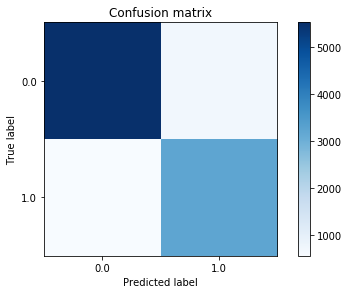


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8601
Confusion matrix
[[5481  801]
 [ 598 3120]]


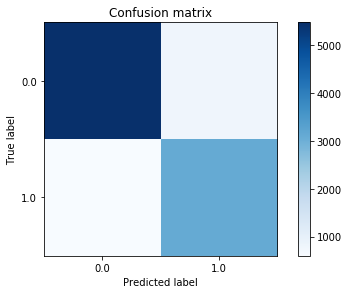


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8136
Confusion matrix
[[5478 1263]
 [ 601 2658]]


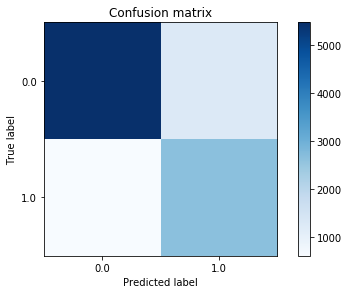


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.7648
Confusion matrix
[[5433 1706]
 [ 646 2215]]


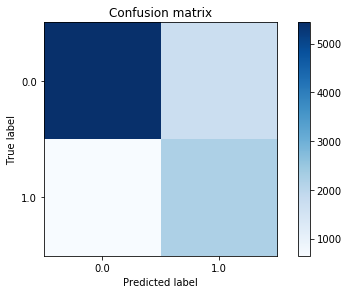


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.7374
Confusion matrix
[[5491 2038]
 [ 588 1883]]


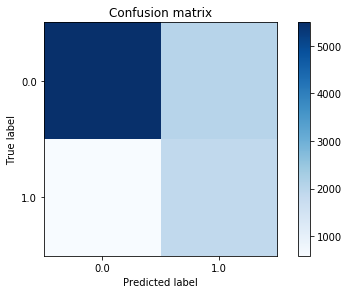


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7132
Confusion matrix
[[5560 2349]
 [ 519 1572]]


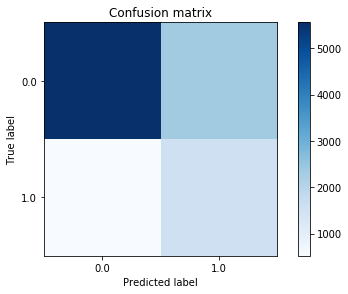


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.676
Confusion matrix
[[5686 2847]
 [ 393 1074]]


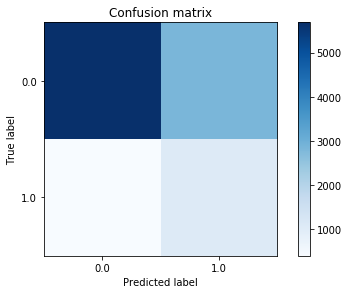


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6612
Confusion matrix
[[5723 3032]
 [ 356  889]]


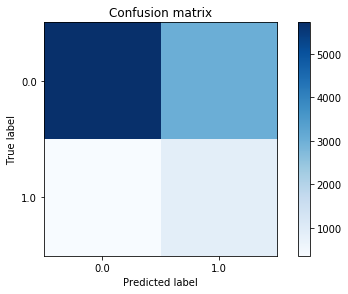


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6486
Confusion matrix
[[5780 3215]
 [ 299  706]]


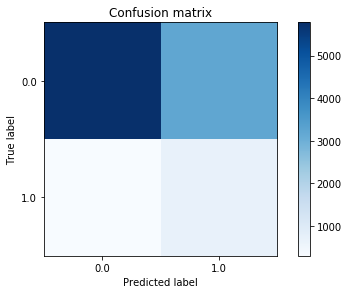


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.6127
Confusion matrix
[[6015 3809]
 [  64  112]]


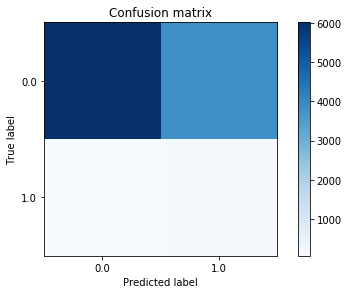


---------------------------------------------------------
Breakdown Distortion:  0.235483870967742


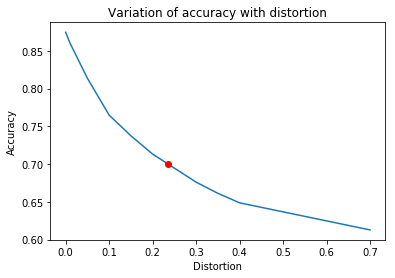

In [0]:
model.insert(1,clf_1)
accuracy[1]=create_dist(test_images,test_label_h1,1)

#Model 2

*8 or 0*

In [0]:
train_images_h2=np.empty([11774,784])
test_images_h2=np.empty([1954,784])
train_label_h2=np.empty([11774,])
test_label_h2=np.empty([1954,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0:
    train_label_h2[j]=0
    train_images_h2[j]=train_images[i]
    j=j+1
  elif train_label[i]==8:
    train_label_h2[j]=1
    train_images_h2[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0:   
    test_label_h2[j]=0
    test_images_h2[j]=test_images[i]
    j=j+1
  elif test_label[i]==8:
    test_label_h2[j]=1
    test_images_h2[j]=test_images[i]
    j=j+1
print(j)   

11774
1954


In [0]:
clf_2=LogisticRegression(solver='lbfgs',max_iter=700)
clf_2.fit(train_images_h2,train_label_h2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction=clf_2.predict(test_images_h2)
accuracy_score(prediction,test_label_h2)

0.9928352098259979

Distortion:  0                    Accuracy:   0.9928352098259979
Confusion matrix
[[977  11]
 [  3 963]]


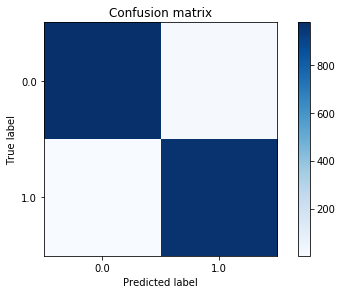


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9918116683725691
Confusion matrix
[[976  12]
 [  4 962]]


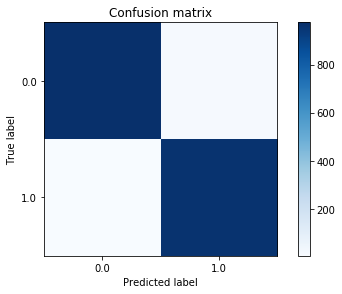


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9902763561924258
Confusion matrix
[[975  14]
 [  5 960]]


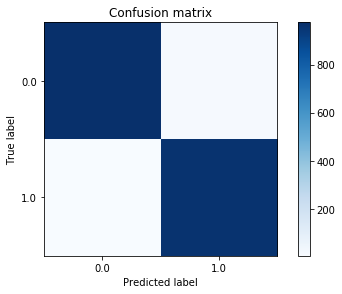


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9887410440122825
Confusion matrix
[[973  15]
 [  7 959]]


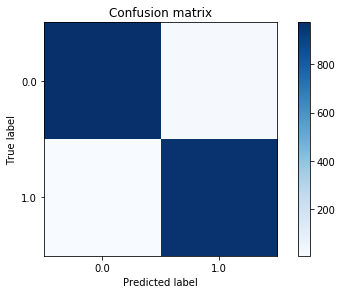


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9861821903787104
Confusion matrix
[[966  13]
 [ 14 961]]


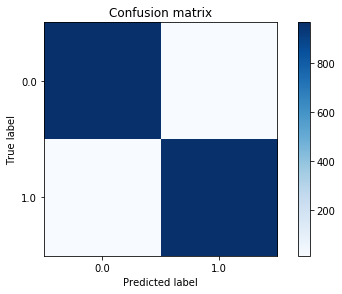


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9831115660184238
Confusion matrix
[[959  12]
 [ 21 962]]


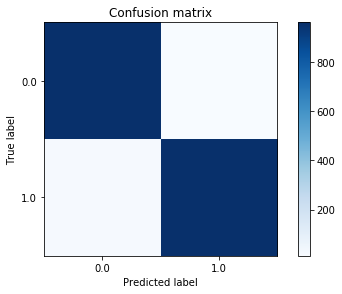


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9687819856704196
Confusion matrix
[[932  13]
 [ 48 961]]


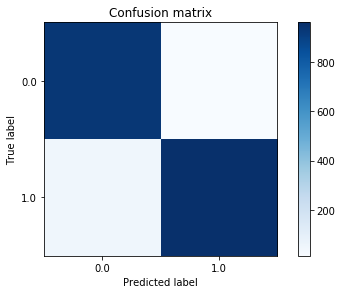


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9508700102354145
Confusion matrix
[[895  11]
 [ 85 963]]


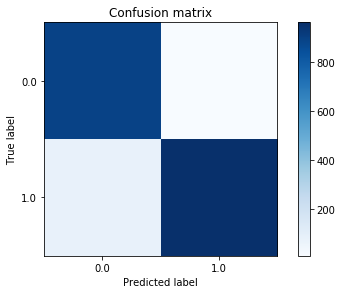


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9396110542476971
Confusion matrix
[[873  11]
 [107 963]]


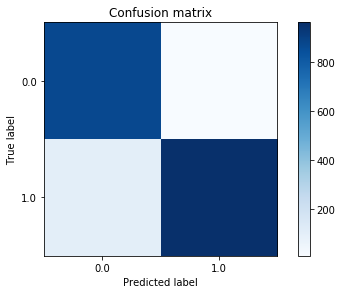


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.7077789150460594
Confusion matrix
[[432  23]
 [548 951]]


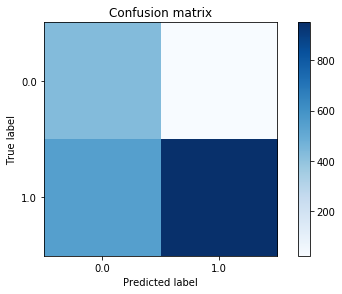


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(2,clf_2)
acc[2]=create_dist(test_images_h2,test_label_h2,2)

#Model 3 (08 or 69)

In [0]:
train_images_h3=np.empty([23641,784])
test_images_h3=np.empty([3921,784])
train_label_h3=np.empty([23641,])
test_label_h3=np.empty([3921,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0 or train_label[i]==8:   
    train_label_h3[j]=0
    train_images_h3[j]=train_images[i]
    j=j+1
  elif train_label[i]==6 or train_label[i]==9:
    train_label_h3[j]=1
    train_images_h3[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0 or test_label[i]==8:   
    test_label_h3[j]=0
    test_images_h3[j]=test_images[i]
    j=j+1
  elif test_label[i]==6 or test_label[i]==9:
    test_label_h3[j]=1
    test_images_h3[j]=test_images[i]
    j=j+1
print(j)  

23641
3921


In [0]:
clf_3=LogisticRegression()
clf_3.fit(train_images_h3,train_label_h3)
prediction=clf_3.predict(test_images_h3)
accuracy_score(prediction,test_label_h3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9668451925529201

Distortion:  0                    Accuracy:   0.9668451925529201
Confusion matrix
[[1893   69]
 [  61 1898]]


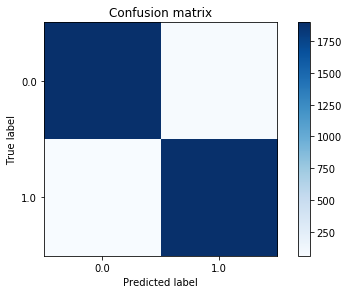


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9576638612598827
Confusion matrix
[[1854   66]
 [ 100 1901]]


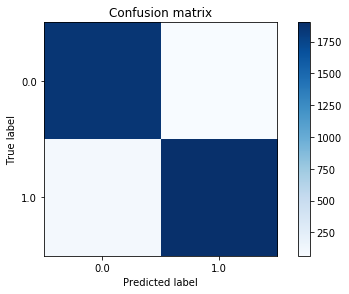


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9145626115786789
Confusion matrix
[[1664   45]
 [ 290 1922]]


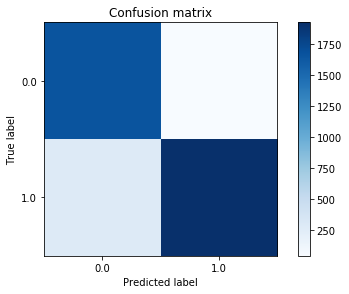


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8339709257842387
Confusion matrix
[[1334   31]
 [ 620 1936]]


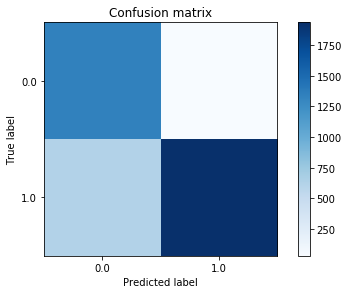


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.7413925019127774
Confusion matrix
[[ 949    9]
 [1005 1958]]


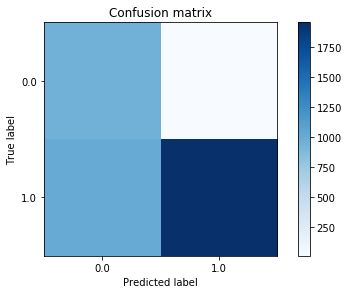


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.6426931905126243
Confusion matrix
[[ 563   10]
 [1391 1957]]


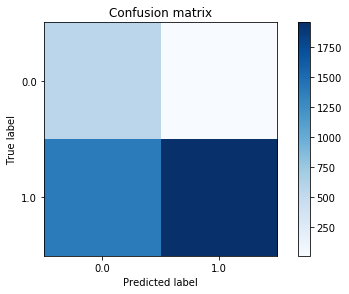


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.5429737311910227
Confusion matrix
[[ 163    1]
 [1791 1966]]


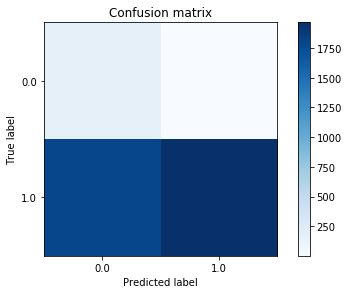


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5159398112726346
Confusion matrix
[[  57    1]
 [1897 1966]]


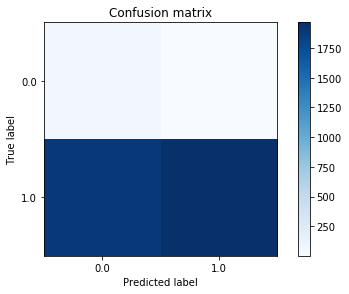


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5090538128028564
Confusion matrix
[[  29    0]
 [1925 1967]]


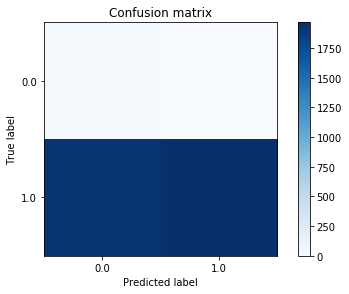


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.501657740372354
Confusion matrix
[[   0    0]
 [1954 1967]]


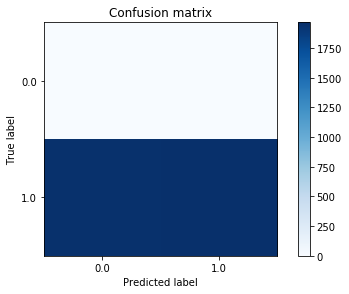


---------------------------------------------------------
Breakdown Distortion:  0.17096899224806206


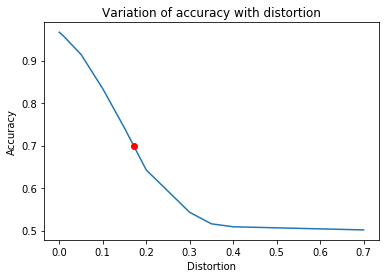

In [0]:
model.insert(3,clf_3)
acc[3]=create_dist(test_images_h3,test_label_h3,3)

#Model4

*6 or 9*

In [0]:
train_images_h4=np.empty([11867,784])
test_images_h4=np.empty([1967,784])
train_label_h4=np.empty([11867,])
test_label_h4=np.empty([1967,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==6:   
    train_label_h4[j]=0
    train_images_h4[j]=train_images[i]
    j=j+1
  elif train_label[i]==9:
    train_label_h4[j]=1
    train_images_h4[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==6:   
    test_label_h4[j]=0
    test_images_h4[j]=test_images[i]
    j=j+1
  elif test_label[i]==9:
    test_label_h4[j]=1
    test_images_h4[j]=test_images[i]
    j=j+1
print(j)   

11867
1967


In [0]:
clf_4=LogisticRegression()
clf_4.fit(train_images_h4,train_label_h4)
prediction=clf_4.predict(test_images_h4)
accuracy_score(prediction,test_label_h4)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.99644128113879

Distortion:  0                    Accuracy:   0.99644128113879
Confusion matrix
[[ 954    3]
 [   4 1006]]


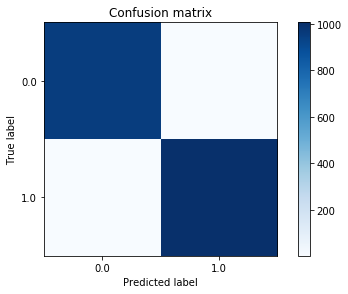


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9969496695475343
Confusion matrix
[[ 955    3]
 [   3 1006]]


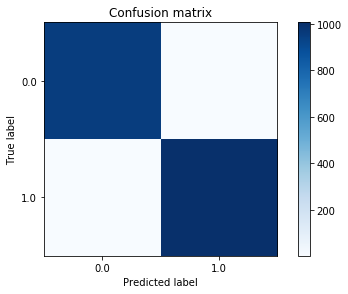


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9959328927300457
Confusion matrix
[[ 954    4]
 [   4 1005]]


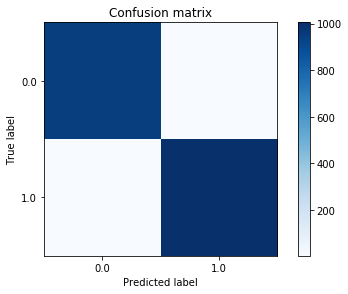


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9969496695475343
Confusion matrix
[[ 955    3]
 [   3 1006]]


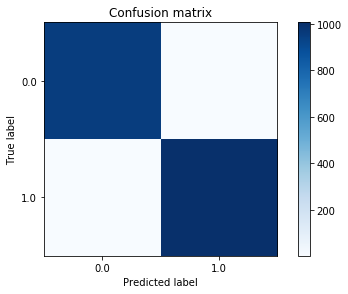


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9954245043213015
Confusion matrix
[[ 953    4]
 [   5 1005]]


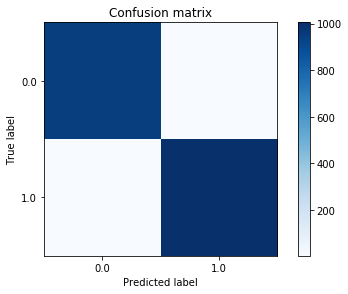


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9938993390950687
Confusion matrix
[[ 948    2]
 [  10 1007]]


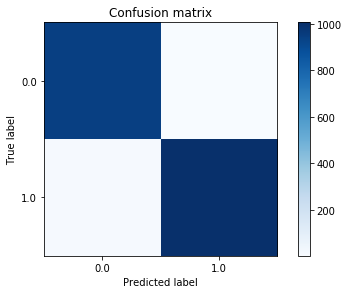


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9867819013726487
Confusion matrix
[[ 936    4]
 [  22 1005]]


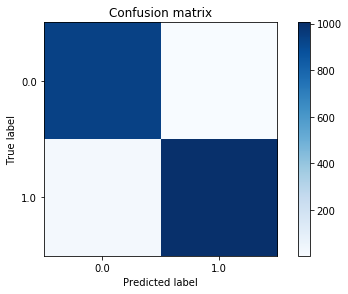


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9842399593289273
Confusion matrix
[[ 932    5]
 [  26 1004]]


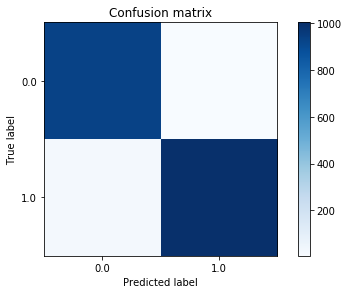


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9816980172852059
Confusion matrix
[[ 926    4]
 [  32 1005]]


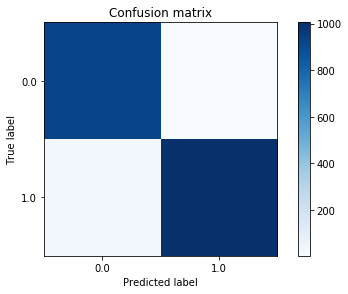


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.8093543467208948
Confusion matrix
[[596  13]
 [362 996]]


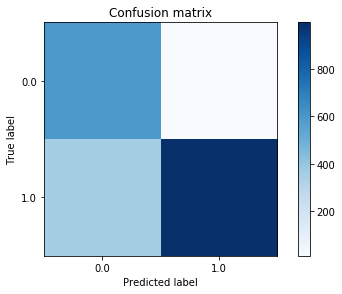


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(4,clf_4)
acc[4]=create_dist(test_images_h4,test_label_h4,4)

#Model 5

*147 or 235*

In [0]:
train_no=36359
test_no=6079
train_images_h5=np.empty([train_no,784])
test_images_h5=np.empty([test_no,784])
train_label_h5=np.empty([train_no,])
test_label_h5=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1 or train_label[i]==4 or train_label[i]==7:   
    train_label_h5[j]=0
    train_images_h5[j]=train_images[i]
    j=j+1
  elif train_label[i]==2 or train_label[i]==3 or train_label[i]==5:
    train_label_h5[j]=1
    train_images_h5[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1 or test_label[i]==4 or test_label[i]==7:   
    test_label_h5[j]=0
    test_images_h5[j]=test_images[i]
    j=j+1
  elif test_label[i]==2 or test_label[i]==3 or test_label[i]==5:
    test_label_h5[j]=1
    test_images_h5[j]=test_images[i]
    j=j+1
print(j)   

36359
6079


In [0]:
clf_5=LogisticRegression(solver='lbfgs')
clf_5.fit(train_images_h5,train_label_h5)
prediction=clf_5.predict(test_images_h5)
accuracy_score(prediction,test_label_h5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9685803586116137

Distortion:  0                    Accuracy:   0.9685803586116137
Confusion matrix
[[3072  118]
 [  73 2816]]


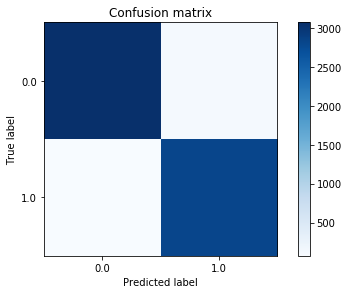


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9615068267807205
Confusion matrix
[[3020  109]
 [ 125 2825]]


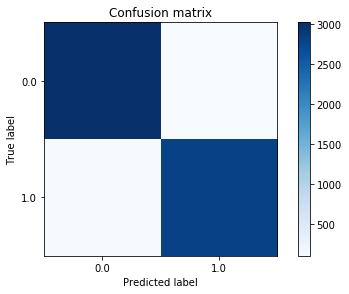


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8899490047705214
Confusion matrix
[[2530   54]
 [ 615 2880]]


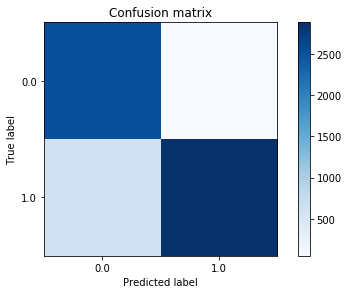


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.7369633163349235
Confusion matrix
[[1565   19]
 [1580 2915]]


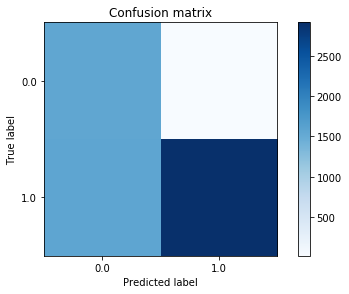


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.6048692219114986
Confusion matrix
[[ 756   13]
 [2389 2921]]


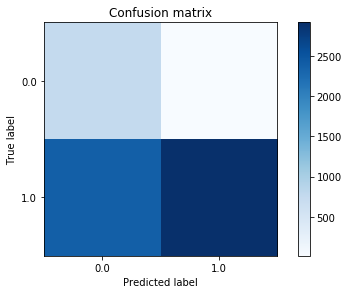


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.5374239184076328
Confusion matrix
[[ 337    4]
 [2808 2930]]


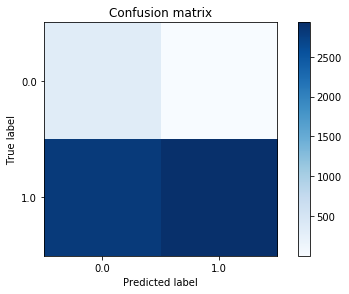


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.4872511926303668
Confusion matrix
[[  28    0]
 [3117 2934]]


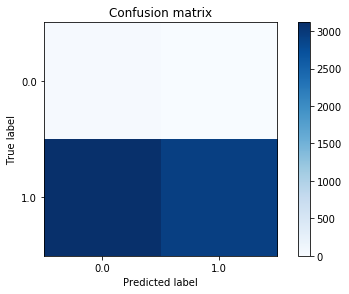


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.48429017930580687
Confusion matrix
[[  10    0]
 [3135 2934]]


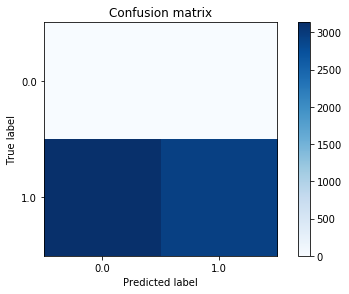


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.4828096726435269
Confusion matrix
[[   1    0]
 [3144 2934]]


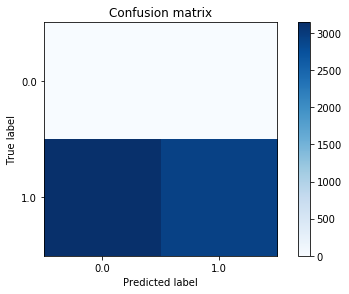


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.48264517190327355
Confusion matrix
[[   0    0]
 [3145 2934]]


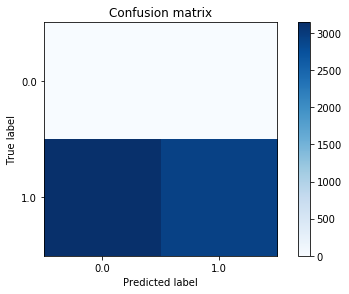


---------------------------------------------------------
Breakdown Distortion:  0.11399128268991285


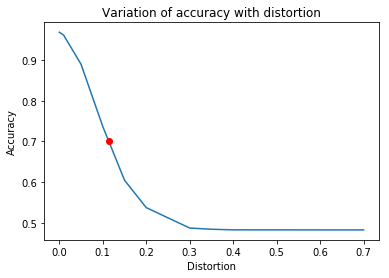

In [0]:
model.insert(5,clf_5)
acc[5]=create_dist(test_images_h5,test_label_h5,5)

#Model 6

*Multiclass 147*

In [0]:
train_no=18849
test_no=2972
train_images_h6=np.empty([train_no,784])
test_images_h6=np.empty([test_no,784])
train_label_h6=np.empty([train_no,])
test_label_h6=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1:   
    train_label_h6[j]=0
    train_images_h6[j]=train_images[i]
    j=j+1
  elif train_label[i]==4:
    train_label_h6[j]=1
    train_images_h6[j]=train_images[i]
    j=j+1
  elif  train_label[i]==7:
    train_label_h6[j]=2
    train_images_h6[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1:   
    test_label_h6[j]=0
    test_images_h6[j]=test_images[i]
    j=j+1
  elif test_label[i]==4:
    test_label_h6[j]=1
    test_images_h6[j]=test_images[i]
    j=j+1
  elif  train_label[i]==7:
    test_label_h6[j]=2
    test_images_h6[j]=test_images[i]
    j=j+1
print(j)

18849
2972


In [0]:
clf_6=LogisticRegression(solver='lbfgs')
clf_6.fit(train_images_h6,train_label_h6)
prediction=clf_6.predict(test_images_h6)
accuracy_score(prediction,test_label_h6)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8162853297442799

Distortion:  0                    Accuracy:   0.8162853297442799
Confusion matrix
[[1131    0  221]
 [   1  979  318]
 [   3    3  316]]


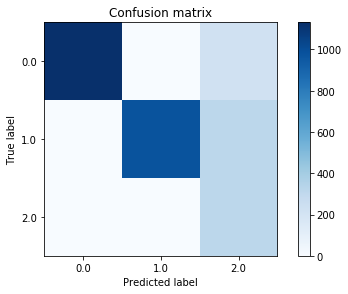


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8176312247644684
Confusion matrix
[[1132    1  214]
 [   1  978  321]
 [   2    3  320]]


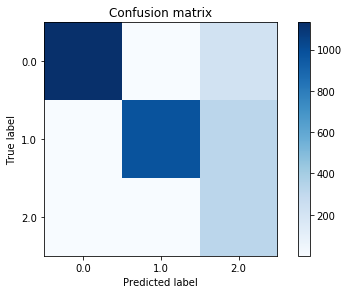


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8243606998654105
Confusion matrix
[[1131    1  209]
 [   1  970  297]
 [   3   11  349]]


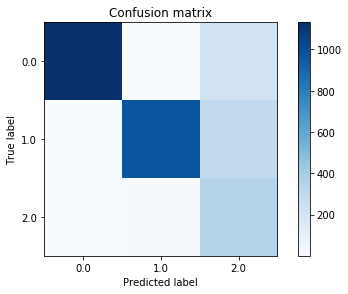


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8216689098250336
Confusion matrix
[[1120    4  189]
 [   2  952  296]
 [  13   26  370]]


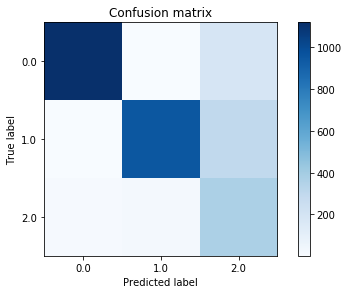


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8236877523553163
Confusion matrix
[[1099    1  174]
 [   2  932  264]
 [  34   49  417]]


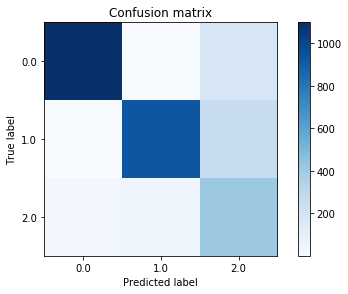


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7873485868102288
Confusion matrix
[[1015    1  178]
 [  12  888  240]
 [ 108   93  437]]


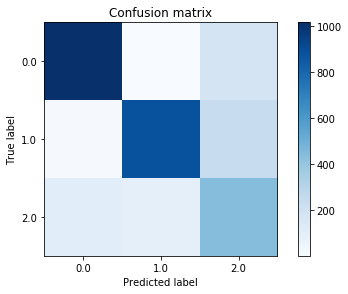


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.699192462987887
Confusion matrix
[[821   2 137]
 [ 20 750 211]
 [294 230 507]]


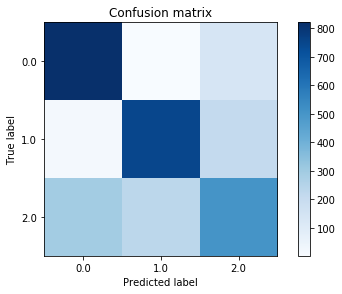


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6396366083445492
Confusion matrix
[[693   4 110]
 [ 17 657 194]
 [425 321 551]]


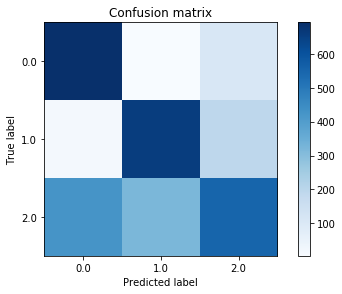


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5888290713324361
Confusion matrix
[[577   3  86]
 [ 22 565 161]
 [536 414 608]]


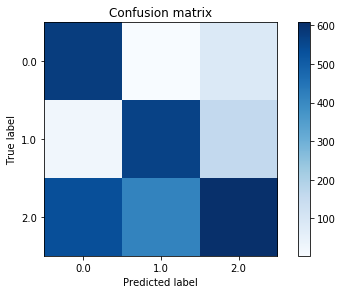


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.319650067294751
Confusion matrix
[[  39    1   13]
 [  19  109   40]
 [1077  872  802]]


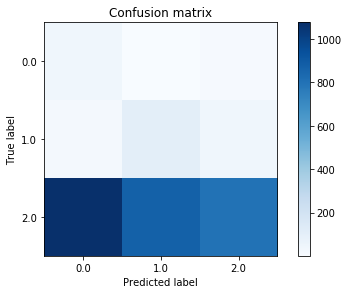


---------------------------------------------------------
Breakdown Distortion:  0.2990839694656489


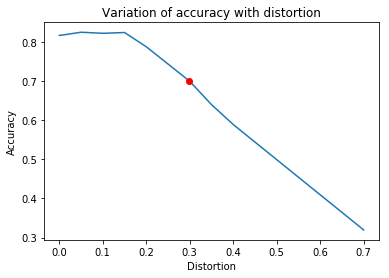

In [0]:
(model.insert(6,clf_6))
acc[6]=create_dist(test_images_h6,test_label_h6,6)


#Model  7


*Multiclass 235*

In [0]:
train_no=17510
test_no=2722
train_images_h7=np.empty([train_no,784])
test_images_h7=np.empty([test_no,784])
train_label_h7=np.empty([train_no,])
test_label_h7=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==2:   
    train_label_h7[j]=0
    train_images_h7[j]=train_images[i]
    j=j+1
  elif train_label[i]==3:
    train_label_h7[j]=1
    train_images_h7[j]=train_images[i]
    j=j+1
  elif  train_label[i]==5:
    train_label_h7[j]=2
    train_images_h7[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==2:   
    test_label_h7[j]=0
    test_images_h7[j]=test_images[i]
    j=j+1
  elif test_label[i]==3:
    test_label_h7[j]=1
    test_images_h7[j]=test_images[i]
    j=j+1
  elif  train_label[i]==5:
    test_label_h7[j]=2
    test_images_h7[j]=test_images[i]
    j=j+1
print(j)

17510
2722


In [0]:
clf_7=LogisticRegression(solver='lbfgs',max_iter=70)
clf_7.fit(train_images_h7,train_label_h7)
prediction=clf_7.predict(test_images_h7)
accuracy_score(prediction,test_label_h7)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8251285819250551

Distortion:  0                    Accuracy:   0.8251285819250551
Confusion matrix
[[993  16 207]
 [ 20 969 189]
 [ 19  25 284]]


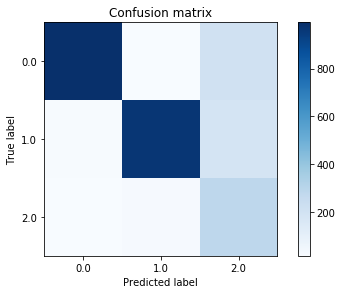


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8218221895664952
Confusion matrix
[[990  21 212]
 [ 21 962 183]
 [ 21  27 285]]


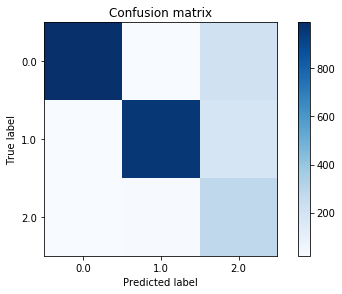


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8108008817046289
Confusion matrix
[[966  22 199]
 [ 35 931 171]
 [ 31  57 310]]


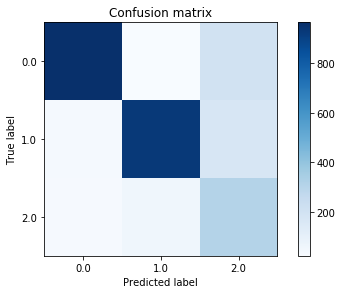


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.7979426891991183
Confusion matrix
[[948  29 176]
 [ 38 897 177]
 [ 46  84 327]]


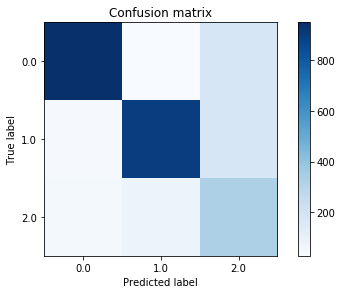


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.7575312270389419
Confusion matrix
[[901  39 192]
 [ 67 839 166]
 [ 64 132 322]]


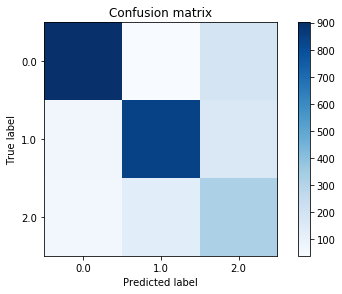


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7406318883174137
Confusion matrix
[[867  50 159]
 [ 80 794 166]
 [ 85 166 355]]


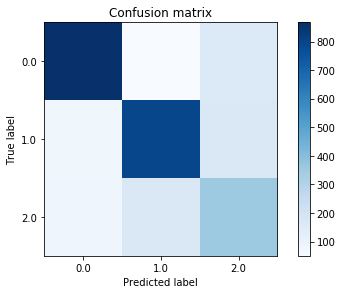


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6785451873622337
Confusion matrix
[[767  61 165]
 [112 707 142]
 [153 242 373]]


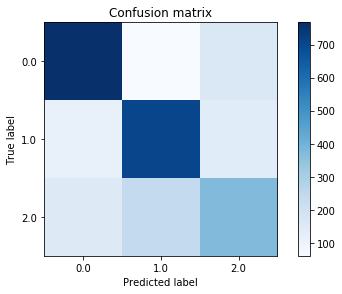


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6403379867744305
Confusion matrix
[[704  56 124]
 [133 642 159]
 [195 312 397]]


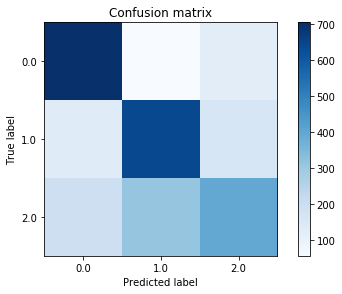


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6076414401175606
Confusion matrix
[[648  48 139]
 [136 598 133]
 [248 364 408]]


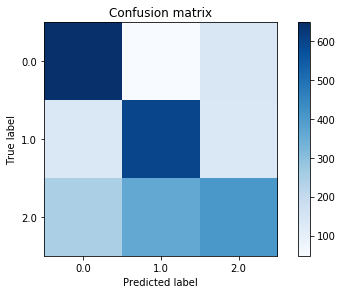


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.42321822189566494
Confusion matrix
[[310  81  74]
 [169 326  90]
 [553 603 516]]


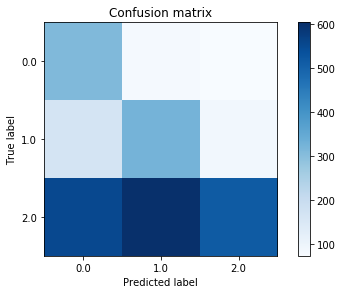


---------------------------------------------------------
Breakdown Distortion:  0.26544378698224863


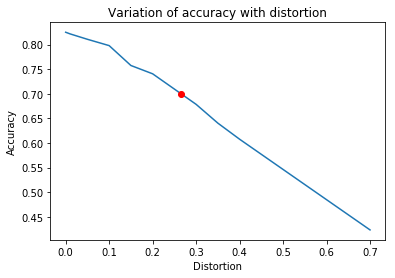

In [0]:
model.insert(7,clf_7)
acc[7]=create_dist(test_images_h7,test_label_h7,7)

#Predictions

In [0]:
def predict_for_one(k):
  if clf_1.predict(test_images[k-1:k])==0:
    print("It doesn't have a circle")
    if  clf_5.predict(test_images[k-1:k])==0:
      print("It has straight lines")
      if clf_6.predict(test_images[k-1:k])==0:
        print("It is 1")
      elif clf_6.predict(test_images[k-1:k])==1:
        print("It is 4")
      else:
        print("It is 7")
    else:
      print("It has curves")
      if clf_7.predict(test_images[k-1:k])==0:
        print("It is 2")
      elif clf_7.predict(test_images[k-1:k])==1:
        print("It is 3")
      else:
        print("It is 5")

  else:
    print("It has a circle")
    if clf_2.predict(test_images[k-1:k])==0:
      print("It is 0 or 8")
      if clf_3.predict(test_images[k-1:k])==0:
        print("It is 0")
      else:
        print("It is 8")
    else:
      print("It is 6 or 9")
      if clf_4.predict(test_images[k-1:k])==0:
        print("It is 6")
      else:
        print("It is 9")
  print()

In [0]:
for k in range(9,19):
  predict_for_one(k)

It doesn't have a circle
It has straight lines
It is 4

It has a circle
It is 6 or 9
It is 9

It has a circle
It is 0 or 8
It is 0

It has a circle
It is 0 or 8
It is 8

It has a circle
It is 6 or 9
It is 9

It has a circle
It is 0 or 8
It is 0

It doesn't have a circle
It has straight lines
It is 1

It doesn't have a circle
It has curves
It is 5

It has a circle
It is 6 or 9
It is 9

It doesn't have a circle
It has straight lines
It is 7



In [0]:
ar=np.empty([10000])
def predict(ar,m):
  if clf_1.predict(test_images[m-1:m])==0:
    #print("It doesn't have a circle")
    if  clf_5.predict(test_images[m-1:m])==0:
      #print("It has straight lines")
      if clf_6.predict(test_images[m-1:m])==0:
        ar[m-1]=1
      elif clf_6.predict(test_images[m-1:m])==1:
        ar[m-1]=4
      else:
        ar[m-1]=7
    else:
      if clf_7.predict(test_images[m-1:m])==0:
        ar[m-1]=2
      elif clf_7.predict(test_images[m-1:m])==1:
        ar[m-1]=3
      else:
        ar[m-1]=5

  else:
    
    if clf_3.predict(test_images[m-1:m])==0:
      
      if clf_2.predict(test_images[m-1:m])==0:
        ar[m-1]=0
      else:
        ar[m-1]=8
    else:
      
      if clf_4.predict(test_images[m-1:m])==0:
        ar[m-1]=6
      else:
        ar[m-1]=9

In [0]:
ar=np.empty([10000])
for i in range(1,10001):
  predict(ar,i)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ar,test_label)

0.8393

In [0]:
confusion_matrix(ar,test_label)

array([[ 875,    0,   34,   10,    2,   20,   18,    7,    8,    4],
       [   1, 1096,   11,    4,    0,    5,    6,    9,   30,    7],
       [  21,    8,  831,   12,   10,    5,   38,   19,   35,    2],
       [   7,    6,   14,  916,    3,   35,    1,    8,   75,   13],
       [   1,    0,   17,    4,  831,   14,   24,   11,   22,  101],
       [  50,    0,    9,   18,    1,  677,   27,    1,   73,    8],
       [  15,    2,   39,    1,   36,   20,  836,    0,   16,    2],
       [   5,    1,   13,   19,    2,    6,    4,  911,   18,  133],
       [   1,   22,   61,   18,    4,   83,    3,   10,  693,   12],
       [   4,    0,    3,    8,   93,   27,    1,   52,    4,  727]])

#Adversaries

In [0]:
test=np.empty([10000,784])
for i in range(10000):
  for j in range(784):
    test[i][j]=test_images[i][j]
    
def distort(distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test

def predict():
  predictedarr=np.empty(10000)
  for j in range(10000):
    arr=(model.predict(dist_test[j].reshape(1,28,28))[0])
    for i in range (10):
      if max(arr)==arr[i]:
        predictedarr[j]=i
  return predictedarr

In [0]:
def predictadv(ar,m):
  if clf_1.predict(dist_test[m-1:m])==0:
    #print("It doesn't have a circle")
    if  clf_5.predict(dist_test[m-1:m])==0:
      #print("It has straight lines")
      if clf_6.predict(dist_test[m-1:m])==0:
        ar[m-1]=1
      elif clf_6.predict(dist_test[m-1:m])==1:
        ar[m-1]=4
      else:
        ar[m-1]=7
    else:
      if clf_7.predict(dist_test[m-1:m])==0:
        ar[m-1]=2
      elif clf_7.predict(dist_test[m-1:m])==1:
        ar[m-1]=3
      else:
        ar[m-1]=5

  else:
    
    if clf_3.predict(dist_test[m-1:m])==0:
      
      if clf_2.predict(dist_test[m-1:m])==0:
        ar[m-1]=0
      else:
        ar[m-1]=8
    else:
      
      if clf_4.predict(dist_test[m-1:m])==0:
        ar[m-1]=6
      else:
        ar[m-1]=9

In [0]:
def colour_conf_mat(pred,test_label):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,np.unique(test_label), title='Confusion matrix')
  plt.show()


Distortion:  0                Accuracy:   0.8393

Confusion matrix
[[ 875    0   34   10    2   20   18    7    8    4]
 [   1 1096   11    4    0    5    6    9   30    7]
 [  21    8  831   12   10    5   38   19   35    2]
 [   7    6   14  916    3   35    1    8   75   13]
 [   1    0   17    4  831   14   24   11   22  101]
 [  50    0    9   18    1  677   27    1   73    8]
 [  15    2   39    1   36   20  836    0   16    2]
 [   5    1   13   19    2    6    4  911   18  133]
 [   1   22   61   18    4   83    3   10  693   12]
 [   4    0    3    8   93   27    1   52    4  727]]


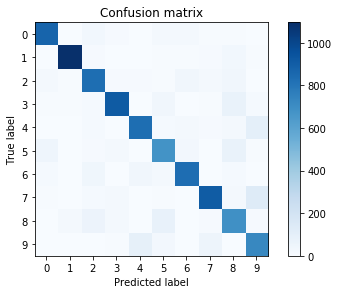


__________________________________________________________

Distortion:  0.01                Accuracy:   0.8216

Confusion matrix
[[ 861    0   33    9    2   20   17    5    7    3]
 [   0 1084    8    4    0    5    4    8   28   11]
 [  31   16  848   15   12    4   57   22   48    3]
 [   6    9   16  901    7   29    1   16   82   16]
 [   1    0   10    1  804   11   29   10   24  135]
 [  54    2    8   28    9  685   28    2   81   11]
 [  17    3   37    1   40   21  813    0   14    2]
 [   3    1   13   17    3    5    4  888   14  145]
 [   1   20   54   25    4   85    4   12  661   12]
 [   6    0    5    9  101   27    1   65   15  671]]


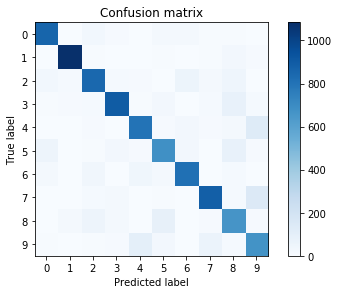


__________________________________________________________

Distortion:  0.05                Accuracy:   0.7181

Confusion matrix
[[713   0  27   2   0  16   6   4   7   1]
 [  0 864   2   2   1   6   4   4  17   3]
 [ 51 110 845  16  48   7 104  51  64  20]
 [ 14  86  21 872  26  49   5  99 117  58]
 [  2   0   4   0 698   5  30  10  21 140]
 [117  24  25  45  44 680  63  30 154  61]
 [ 54   8  44   4  39  27 741   0  39   1]
 [  3   0  10  15  11   2   3 749  10 191]
 [  4  29  50  30   0  64   1   9 495  10]
 [ 22  14   4  24 115  36   1  72  50 524]]


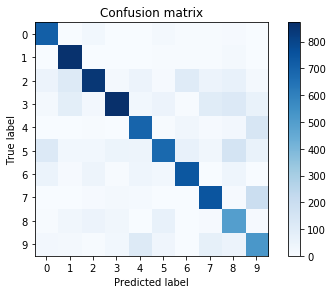


__________________________________________________________

Distortion:  0.1                Accuracy:   0.5588

Confusion matrix
[[520   0  20   7   0  10   2   0   6   2]
 [  0 425   1   1   2   1   2   4   3   0]
 [ 90 267 842  23 123   5 169  93 102  46]
 [ 17 295  34 843  79  42  10 228 144 132]
 [  0   1   3   1 457   2  21   2   8  93]
 [183  85  31  67 183 690 125 126 231 166]
 [ 97  18  44   9  28  37 624   0  55   2]
 [  0   8   3   7  14   1   3 481   8 150]
 [  5  14  38  16   0  34   1   7 291   3]
 [ 68  22  16  36  96  70   1  87 126 415]]


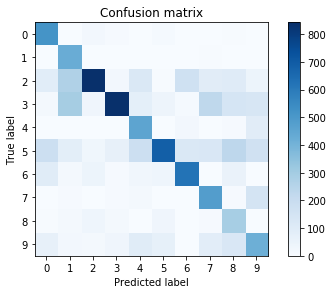


__________________________________________________________

Distortion:  0.15                Accuracy:   0.4278

Confusion matrix
[[336   0  15   2   0   5   0   1   2   1]
 [  0 155   0   0   0   0   1   0   1   2]
 [100 315 819  29 187  19 203 123 119  79]
 [ 23 414  49 782 103  48  11 362 175 190]
 [  0   0   1   0 251   2  14   3   5  51]
 [257 166  55 122 289 691 175 223 307 252]
 [145  27  52   8  31  39 544   0  61   1]
 [  0  10   2   6   9   2   6 233   2 102]
 [  4   9  23   8   1  20   0   3 139   3]
 [115  39  16  53 111  66   4  80 163 328]]


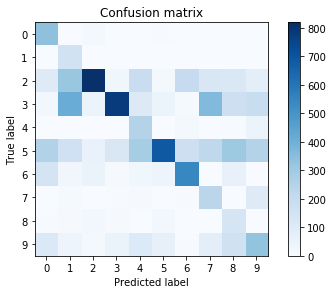


__________________________________________________________

Distortion:  0.2                Accuracy:   0.3477

Confusion matrix
[[166   0   3   3   0   5   0   0   1   0]
 [  0  45   0   0   0   0   0   0   2   0]
 [135 320 779  41 205  15 276 146 129  86]
 [ 34 463  76 770 163  59  23 390 182 238]
 [  0   0   0   0 114   0   4   0   0  18]
 [329 253  81 146 371 702 206 305 337 348]
 [161  17  53  11  19  33 445   0  56   0]
 [  0   5   1   1   3   1   1  97   2  38]
 [  0   0  17   5   0  12   0   4  79   1]
 [155  32  22  33 107  65   3  86 186 280]]


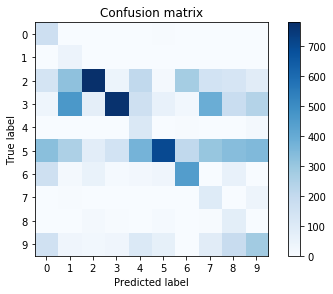


__________________________________________________________

Distortion:  0.3                Accuracy:   0.2621

Confusion matrix
[[ 35   0   1   0   0   1   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0]
 [147 311 675  52 222  30 286 162 123 117]
 [ 48 438 106 654 169  74  26 400 203 292]
 [  0   0   0   0  15   0   0   0   0   1]
 [471 345 160 250 484 718 321 385 428 416]
 [122   6  57   7  14  17 323   1  29   0]
 [  0   2   0   0   1   0   0  11   0   8]
 [  1   1   3   1   0   3   0   0  12   0]
 [156  29  30  46  77  49   2  69 179 175]]


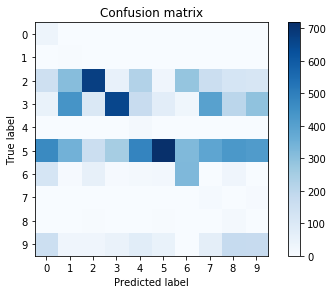


__________________________________________________________

Distortion:  0.35                Accuracy:   0.2388

Confusion matrix
[[  6   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [150 282 650  47 228  26 299 139 132 110]
 [ 57 443 107 630 159  79  40 404 187 270]
 [  0   0   0   0   2   0   0   0   0   0]
 [497 362 209 279 521 708 387 430 493 468]
 [110  10  33  12  15  17 229   1  31   1]
 [  0   1   0   0   2   0   0   4   0   3]
 [  0   0   1   0   0   2   0   0   2   0]
 [160  37  31  42  55  60   3  50 129 157]]


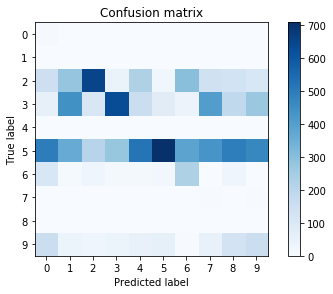


__________________________________________________________

Distortion:  0.4                Accuracy:   0.2262

Confusion matrix
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [171 279 645  49 180  37 314 155 112 107]
 [ 50 389 124 590 181  69  47 363 172 241]
 [  0   0   0   0   1   0   0   0   0   0]
 [534 418 227 329 562 707 400 461 572 536]
 [ 88  19  18   7  10  23 192   0  17   0]
 [  0   1   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   2   0]
 [137  29  17  35  48  56   5  49  99 125]]


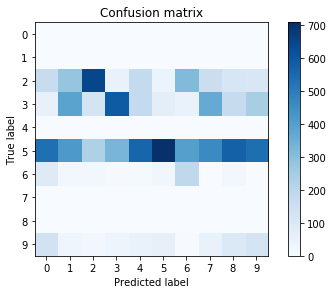


__________________________________________________________

Distortion:  0.7                Accuracy:   0.1434

Confusion matrix
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 99 158 294  75 109  26 159 106  88  89]
 [ 70 270 152 337 157  90  79 260 152 196]
 [  0   0   0   0   0   0   0   0   0   0]
 [777 694 578 590 705 767 692 646 716 706]
 [  6   4   3   1   1   0  19   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 28   9   5   7  10   9   9  16  18  17]]


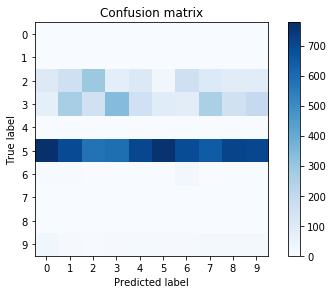


__________________________________________________________



In [0]:
distortion_list=[0,0.01,0.05,0.1,0.15,0.2,0.3,0.35,0.4,0.7]
acc=[]
for j,distortion in enumerate(distortion_list):
  dist_test=np.empty([10000,784])
  for i in range(10000):
    dist_test[i]=distort(distortion,i)
  pred=np.empty([10000])
  for i in range(1,10001):
    predictadv(pred,i)
  test_acc=accuracy_score(pred,test_label)
  acc.insert(j,test_acc)
  print("Distortion: ",distortion,"              ","Accuracy:  ",test_acc)
  print()
  (colour_conf_mat(pred,test_label))
  print()
  print("__________________________________________________________")
  print()

Breakdown Distortion:  0.05568110483364721


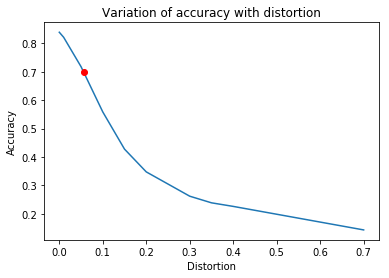

In [0]:
plotgraph(acc,distortion_list)

#Level Wise Adversaries:

In [0]:
def predictlvl2(ar,m):
  if clf_1.predict(dist_test[m-1:m])==0:
    #print("It doesn't have a circle")
    if  clf_5.predict(dist_test[m-1:m])==0:
      ar[m-1] = 0
    else:
      ar[m-1] = 1

  else:

    if clf_3.predict(dist_test[m-1:m])==0:
      ar[m-1] = 2
    else:

      ar[m-1] = 3

In [0]:
test_lvl2=np.empty([10000])
for i in range(10000):
  if(test_label[i]==1 or test_label[i]==4 or test_label[i]==7):
    test_lvl2[i] = 0
  elif(test_label[i]==2 or test_label[i]==3 or test_label[i]==5):
    test_lvl2[i] = 1
  elif(test_label[i]==0 or test_label[i]==8):
    test_lvl2[i] = 2
  else:
    test_lvl2[i] = 3

Distortion:  0                Accuracy:   0.8521

Confusion matrix
[[2861   93   77  275]
 [  56 2517  261   89]
 [  45  226 1577   37]
 [ 183   98   39 1566]]


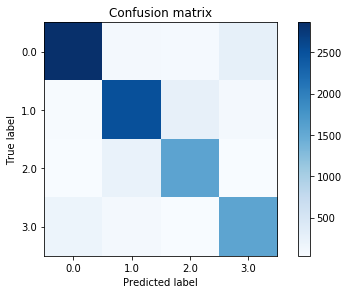


__________________________________________________________

Distortion:  0.01                Accuracy:   0.8347

Confusion matrix
[[2815   76   69  308]
 [  87 2523  323  126]
 [  46  223 1509   33]
 [ 197  112   53 1500]]


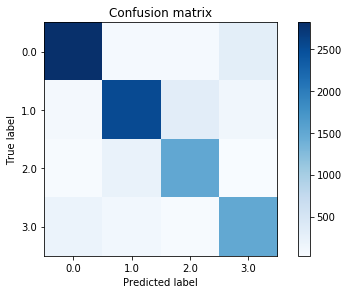


__________________________________________________________

Distortion:  0.05                Accuracy:   0.7381

Confusion matrix
[[2345   49   42  372]
 [ 501 2539  514  297]
 [  48  195 1224   25]
 [ 251  151  174 1273]]


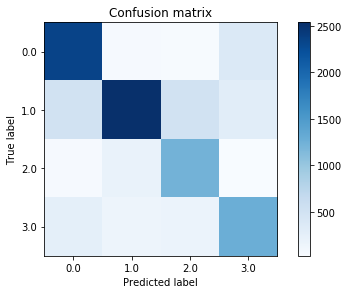


__________________________________________________________

Distortion:  0.1                Accuracy:   0.5839

Confusion matrix
[[1387   12   25  288]
 [1446 2573  748  600]
 [  20  142  809    9]
 [ 292  207  372 1070]]


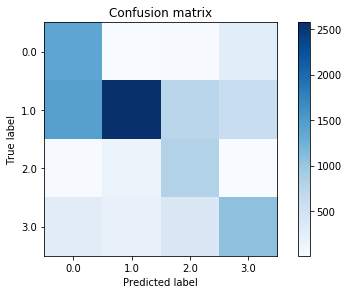


__________________________________________________________

Distortion:  0.15                Accuracy:   0.4744

Confusion matrix
[[ 688   10    9  147]
 [2160 2639  978  899]
 [  18   75  504    8]
 [ 279  210  463  913]]


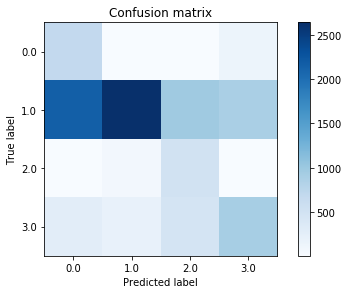


__________________________________________________________

Distortion:  0.2                Accuracy:   0.3912

Confusion matrix
[[ 275    5    2   54]
 [2619 2648 1115 1190]
 [   2   41  269    3]
 [ 249  240  568  720]]


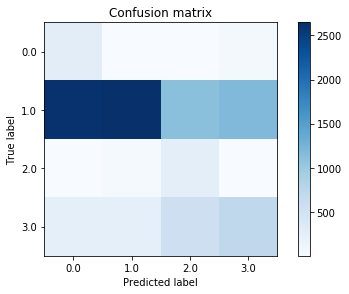


__________________________________________________________

Distortion:  0.3                Accuracy:   0.3352

Confusion matrix
[[  37    1    0    6]
 [2902 2746 1388 1435]
 [   0   10   43    0]
 [ 206  177  523  526]]


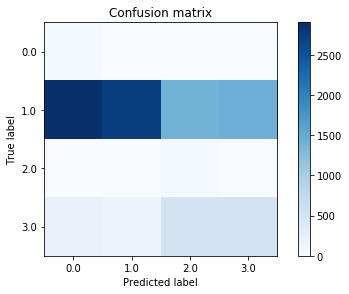


__________________________________________________________

Distortion:  0.35                Accuracy:   0.3196

Confusion matrix
[[   6    0    0    0]
 [2957 2771 1485 1565]
 [   0    4   17    0]
 [ 182  159  452  402]]


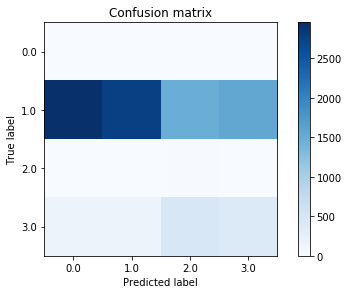


__________________________________________________________

Distortion:  0.4                Accuracy:   0.3117

Confusion matrix
[[   2    0    0    0]
 [2975 2779 1578 1635]
 [   0    2    4    0]
 [ 168  153  372  332]]


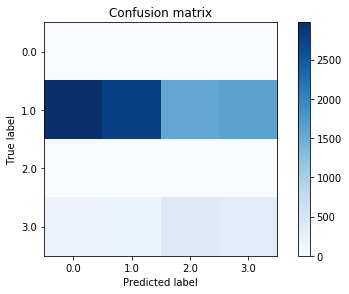


__________________________________________________________

Distortion:  0.7                Accuracy:   0.295

Confusion matrix
[[   0    0    0    0]
 [3105 2890 1913 1907]
 [   0    0    0    0]
 [  40   44   41   60]]


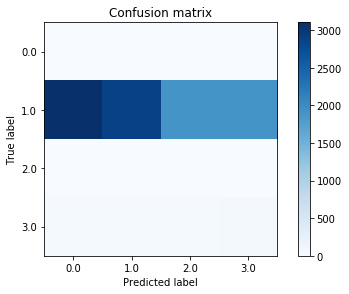


__________________________________________________________

Breakdown Distortion:  0.062354085603112855


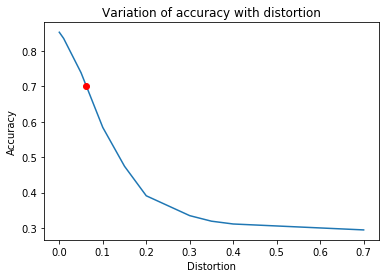

In [0]:
acc=[]
for j,distortion in enumerate(distortion_list):
  dist_test=np.empty([10000,784])
  for i in range(10000):
    dist_test[i]=distort(distortion,i)
  pred=np.empty([10000])
  for i in range(1,10001):
    predictlvl2(pred,i)
  test_acc = accuracy_score(pred,test_lvl2)
  acc.insert(j,test_acc)
  print("Distortion: ",distortion,"              ","Accuracy:  ",test_acc)
  print()
  (colour_conf_mat(pred,test_lvl2))
  print()
  print("__________________________________________________________")
  print()
plotgraph(acc,distortion_list)

In [0]:
print(time.time()-start)

542.8803281784058
